In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re
import scipy.stats as stats

### 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions

In [3]:
claim=pd.read_csv(r"C:\Users\kmaye\Downloads\python case study\Case Study 3 - Insurance Claims Case Study\claims.csv")
claim.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [4]:
demo = pd.read_csv(r"C:\Users\kmaye\Downloads\python case study\Case Study 3 - Insurance Claims Case Study\cust_demographics.csv")
demo.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [5]:
merged_df = pd.merge(claim,demo, left_on="customer_id",right_on= "CUST_ID",how="left").drop(columns='CUST_ID')
merged_df.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,Female,11-Mar-84,TN,798-631-4758,Silver
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,Female,01-May-86,MA,413-187-7945,Silver
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No,Male,13-May-77,NV,956-871-8691,Gold


### 2.Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns    and their business significance.
   

In [6]:
merged_df.dtypes

claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
dtype: object

claim_date,DateOfBirth should be in datetime format and claim_amount  datatype should be float/int.

### 3.Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the dollar sign.

In [7]:

merged_df['claim_amount'] = pd.to_numeric(merged_df['claim_amount'].str.replace('$', '',regex=False))



### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [8]:
merged_df['claim_type'].unique()

array(['Material only', 'Injury only', 'Material and injury'],
      dtype=object)

In [9]:
merged_df['unreported_alert_flag'] = np.where((((merged_df['claim_type'] == 'Injury only') |(merged_df['claim_type'] == 'Material and injury')) & (merged_df['police_report'] == 'No')),1,0)
merged_df[merged_df['unreported_alert_flag'] == 1].shape

(149, 16)

### 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [10]:
merged_df['claim_date'] = pd.to_datetime(merged_df['claim_date'])


In [11]:
merged_df = merged_df.sort_values(by='claim_date', ascending=False)
merged_df = merged_df.drop_duplicates(subset='customer_id', keep='first').reset_index(drop=True)
merged_df.shape


(1093, 16)

### 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [12]:
missing_values = merged_df.isnull().sum()
print("Missing Values:")
print(missing_values)

continuous_columns = merged_df.select_dtypes(include=['float64']).columns
merged_df[continuous_columns] = merged_df[continuous_columns].fillna(merged_df[continuous_columns].mean())

categorical_columns = merged_df.select_dtypes(include=['object']).columns
merged_df[categorical_columns] = merged_df[categorical_columns].fillna(merged_df[categorical_columns].mode().iloc[0])

missing_values_after_imputation = merged_df.isnull().sum()
print("\nMissing Values After Imputation:")
print(missing_values_after_imputation)

Missing Values:
claim_id                  0
customer_id               0
incident_cause            0
claim_date                0
claim_area                0
police_report             0
claim_type                0
claim_amount             65
total_policy_claims      10
fraudulent                0
gender                   15
DateOfBirth              15
State                    15
Contact                  15
Segment                  15
unreported_alert_flag     0
dtype: int64

Missing Values After Imputation:
claim_id                 0
customer_id              0
incident_cause           0
claim_date               0
claim_area               0
police_report            0
claim_type               0
claim_amount             0
total_policy_claims      0
fraudulent               0
gender                   0
DateOfBirth              0
State                    0
Contact                  0
Segment                  0
unreported_alert_flag    0
dtype: int64


### 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
    Children < 18
    Youth 18-30
    Adult 30-60
    Senior > 60

In [15]:
merged_df['DateOfBirth'] = pd.to_datetime(merged_df['DateOfBirth'], format='%d-%b-%y')
current_date = pd.to_datetime('today')
merged_df['DateOfBirth'] = merged_df['DateOfBirth'].apply(lambda x: x - pd.DateOffset(years=100) if x.year > current_date.year else x)


merged_df['Age'] = ((current_date - merged_df['DateOfBirth']).dt.days / 365.25).astype(int)

bins = [0, 18, 30, 60, float('inf')]
labels = ['Children', 'Youth', 'Adult', 'Senior']
merged_df['Age_Category'] = pd.cut(merged_df['Age'], bins=bins, labels=labels)

merged_df[['customer_id', 'DateOfBirth', 'Age', 'Age_Category']]

,customer_id,DateOfBirth,Age,Age_Category
0,93915431,1967-09-08,56,Adult
1,38011078,1976-05-20,47,Adult
2,65208809,1964-04-22,59,Adult
3,49290530,1960-04-01,63,Senior
4,28932340,1996-01-05,28,Youth
...,...,...,...,...
1088,61745840,1994-07-24,29,Youth
1089,64840478,1974-02-14,50,Adult
1090,39587790,1965-01-10,59,Adult
1091,65176092,1975-11-23,48,Adult


### 8. What is the average amount claimed by the customers from various segments?

In [16]:
average_claim_amount_by_segment = merged_df.groupby('Segment')['claim_amount'].mean()
print("Average Amount Claimed by Customers from Various Segments:")
average_claim_amount_by_segment

Average Amount Claimed by Customers from Various Segments:


Segment
Gold        12761.663185
Platinum    12370.565077
Silver      12265.736955
Name: claim_amount, dtype: float64

### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [17]:
reference_date = pd.to_datetime('2018-10-01')
filtered_df = merged_df[merged_df['claim_date'] <= reference_date - pd.DateOffset(days=20)]
total_claim_amount_by_cause = filtered_df.groupby('incident_cause')['claim_amount'].sum()
print("Total Claim Amount Based on Incident Cause (at least 20 days prior to 1st October 2018):")
print(total_claim_amount_by_cause)

Total Claim Amount Based on Incident Cause (at least 20 days prior to 1st October 2018):
incident_cause
Crime                 7.269595e+05
Driver error          3.344546e+06
Natural causes        1.315301e+06
Other causes          3.778023e+06
Other driver error    3.342803e+06
Name: claim_amount, dtype: float64


### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [18]:
filtered_df = merged_df[(merged_df['Age_Category'] == 'Adult') & (merged_df['State'].isin(['TX', 'DE', 'AK'])) & (merged_df['incident_cause'].str.contains('Driver' or 'driver'))]
num_adults_driver_issues = len(filtered_df)
print( num_adults_driver_issues)


17


### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart

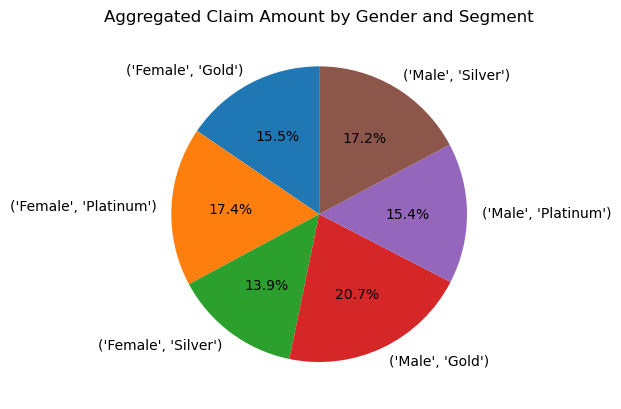

In [21]:
agg_claim_amount = merged_df.groupby(['gender', 'Segment'])['claim_amount'].sum()
# Display the result
plt.pie(agg_claim_amount, labels=agg_claim_amount.index, autopct='%.1f%%', startangle=90)
plt.title('Aggregated Claim Amount by Gender and Segment')
plt.show()

### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

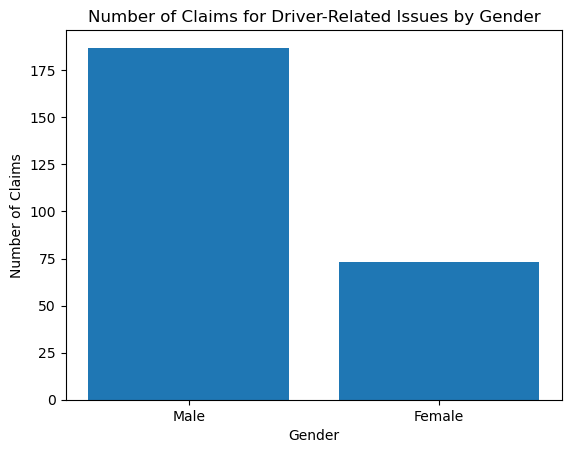

In [22]:
driver_related_df = merged_df[merged_df['incident_cause'].str.contains('Driver' or 'driver')]
gender_claim_count = driver_related_df['gender'].value_counts()

plt.bar(gender_claim_count.index, gender_claim_count)
plt.xlabel('Gender')
plt.ylabel('Number of Claims')
plt.title('Number of Claims for Driver-Related Issues by Gender')
plt.show()

### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

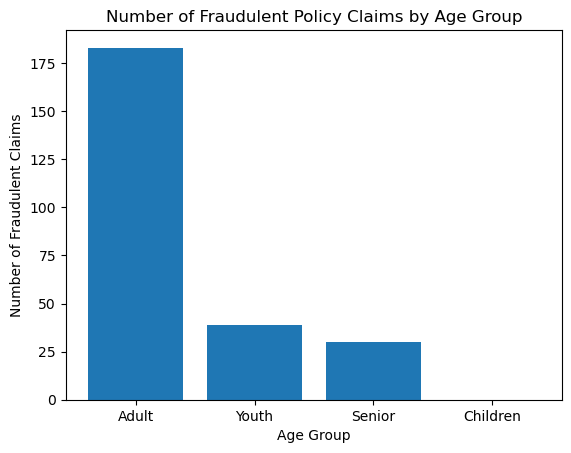

In [23]:
age_fraudulent_count = merged_df[merged_df['fraudulent'] == 'Yes']['Age_Category'].value_counts()

plt.bar(age_fraudulent_count.index, age_fraudulent_count)
plt.xlabel('Age Group')
plt.ylabel('Number of Fraudulent Claims')
plt.title('Number of Fraudulent Policy Claims by Age Group')
plt.show()

### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order

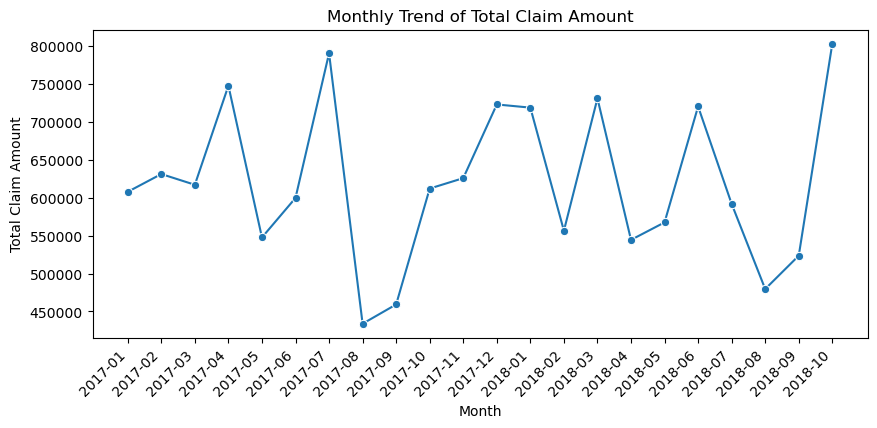

In [27]:
merged_df['YearMonth'] = merged_df['claim_date'].dt.to_period('M')
monthly_claim_amount = merged_df.groupby('YearMonth')['claim_amount'].sum()

plt.figure(figsize=(10, 4))
sns.lineplot(x=monthly_claim_amount.index.astype(str), y=monthly_claim_amount.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Claim Amount')
plt.title('Monthly Trend of Total Claim Amount')
plt.xticks(rotation=45, ha='right')
plt.show()


### 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims. Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements.

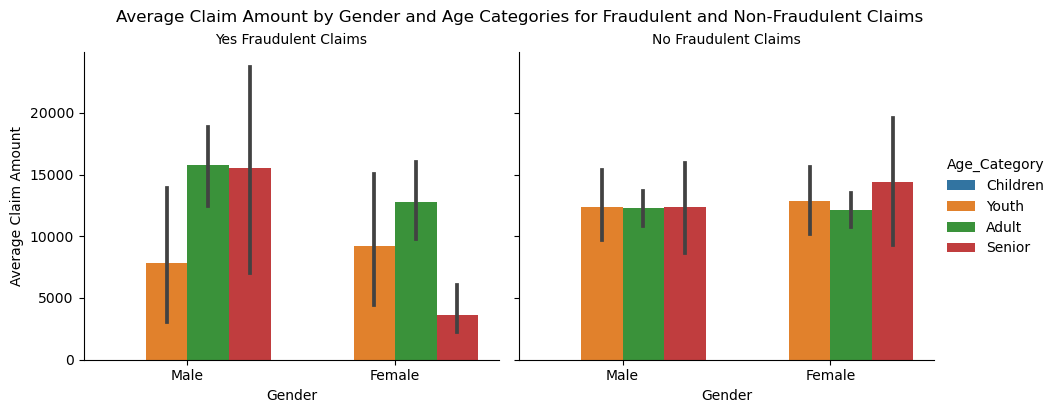

In [29]:

g =sns.catplot(x='gender', y='claim_amount', hue='Age_Category', col='fraudulent', data=merged_df, kind='bar',height=4, aspect=1.2)
g.set_axis_labels('Gender', 'Average Claim Amount')
g.set_titles('{col_name} Fraudulent Claims')
g.fig.suptitle('Average Claim Amount by Gender and Age Categories for Fraudulent and Non-Fraudulent Claims', y=1.02)
plt.show()

In [36]:
#performing hypothesis to check reation between claim amount and fraud
fraudulent_data = merged_df[merged_df['fraudulent'] == 'Yes']
non_fraudulent_data = merged_df[merged_df['fraudulent'] == 'No']

t_statistic,p_value = stats.ttest_ind(fraudulent_data['claim_amount'], non_fraudulent_data['claim_amount'])
print("Independent t-test p-value:" ,t_statistic,p_value)
if p_value>0.05:
    print('There is not enough evidence to reject the null hypothesis,there is no significant diffrence')
else:
    print('Reject the null hypothesis,there is significant diffrence')

Independent t-test p-value: 0.5673149209531335 0.5706169510555018
There is not enough evidence to reject the null hypothesis,there is no significant diffrence


### 16. Is there any similarity in the amount claimed by males and females?

In [37]:
# 1. Hypotheses:
#ho :amount claim by male==amount claim by female
#ha:amount claim by male!=amount claim by female

male_data = merged_df[merged_df['gender'] == 'Male']
female_data = merged_df[merged_df['gender'] == 'Female']
result = stats.ttest_ind(male_data['claim_amount'], female_data['claim_amount'])
print("Two-sample t-test p-value:", result.pvalue)
if result.pvalue>0.05:
    print("Do not reject null hyothesis,There is significant similarity ")
else:
    print("Reject the null hypothesis,There is no similarity")

Two-sample t-test p-value: 0.3695185282320991
Do not reject null hyothesis,There is significant similarity 


### 17. Is there any relationship between age category and segment?


In [38]:
import scipy.stats as stats
contingency_table = pd.crosstab(merged_df['Age_Category'], merged_df['Segment'])
chi2, p, _, _ = stats.chi2_contingency(contingency_table)
print("Chi-square test p-value:", p)
if p<0.05:
    print("Reject the null hypothesis")
else:
    print("Do not reject  the null hypothesis-There is  relationship")

Chi-square test p-value: 0.11619357146102656
Do not reject  the null hypothesis-There is  relationship


### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.


In [46]:
import scipy.stats as stats
import pandas as pd

merged_df['claim_year'] = merged_df['claim_date'].dt.year

# Find the maximum year in the dataset (current year)
current_year = merged_df['claim_year'].max()

# Filter data for the current year
current_year_data = merged_df[merged_df['claim_year'] == current_year]

# Specify the fiscal average for 2016-17
fiscal_average_2016_17 = 10000

# Perform a one-sample t-test
result = stats.ttest_1samp(current_year_data['claim_amount'], popmean=fiscal_average_2016_17)

# Print the p-value
print("T-test p-value:", result.pvalue)

# Set the significance level
alpha = 0.05

# Determine whether to accept or reject the null hypothesis
if result.pvalue < alpha:
    print("Reject the null hypothesis: There is a significant difference in the average claim amount for the current year compared to the fiscal average for 2016-17.")
else:
    print("Do not reject  the null hypothesis: There is no significant difference in the average claim amount for the current year compared to the fiscal average for 2016-17.")



T-test p-value: 1.2444078618606088e-05
Reject the null hypothesis: There is a significant difference in the average claim amount for the current year compared to the fiscal average for 2016-17.


### 19. Is there any difference between age groups and insurance claims?

In [48]:
merged_df['Age_Category'].nunique()

3

In [51]:
from scipy.stats import f_oneway

# Separate the claim amounts for each age group
children_claims = merged_df[merged_df['Age_Category'] == 'Children']['claim_amount']
youth_claims = merged_df[merged_df['Age_Category'] == 'Youth']['claim_amount']
adult_claims = merged_df[merged_df['Age_Category'] == 'Adult']['claim_amount']
senior_claims = merged_df[merged_df['Age_Category'] == 'Senior']['claim_amount']

# Perform ANOVA test
f_statistic, p_value = f_oneway( youth_claims, adult_claims, senior_claims)

# Set the significance level
alpha = 0.05

# Print the p-value
print("ANOVA p-value:", p_value)

# Determine whether to accept or reject the null hypothesis
if p_value <= alpha:
    print("Reject the null hypothesis: There is a significant difference between age groups and insurance claims.")
else:
    print("Do not reject the null hypothesis: There is no significant difference between age groups and insurance claims.")

    

ANOVA p-value: 0.6912605077934713
Do not reject the null hypothesis: There is no significant difference between age groups and insurance claims.


### 20. Is there any relationship between total number of policy claims and the claimed amount?

In [84]:
merged_df.groupby(['total_policy_claims'])['claim_amount'].mean()

total_policy_claims
1.000000    12501.198186
1.586977    13949.768137
2.000000    13765.521195
3.000000    12629.424567
4.000000    11106.921402
5.000000     8530.254176
6.000000    14286.768137
7.000000    23033.000000
8.000000     3277.500000
Name: claim_amount, dtype: float64

In [53]:
from scipy.stats import pearsonr


# Calculate the correlation coefficient
correlation_coefficient, p_value = pearsonr(merged_df['total_policy_claims'], merged_df['claim_amount'])

# Print the correlation coefficient
print("Correlation Coefficient:", correlation_coefficient)
print('P_value:',p_value)



Correlation Coefficient: -0.023908971978697454
P_value: 0.4297309187540837


Based on the correlation coefficient of -0.0239 and the p-value of 0.4297, it indicates that there is a weak, negligible negative correlation between the variables being tested. The p-value suggests that this correlation is not statistically significant, as it is above the typical threshold of 0.05. This means that we fail to reject the null hypothesis, which posits that there is no significant relationship between the variables.